In [1]:
%config InlineBackend.rc = {"figure.dpi": 72, "figure.figsize": (6.0, 4.0)}
%matplotlib inline

import abtem
import ase
import matplotlib.pyplot as plt
from abtem.tilt import precession_tilts
from ase.io import read

(examples:ped_quickstart)=
# PED quickstart

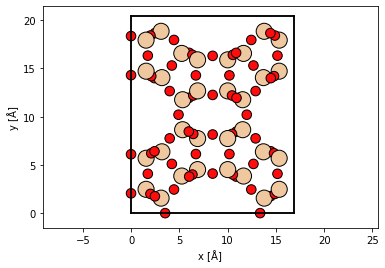

In [2]:
atoms = read("data/SiO2_zeolite.cif")

cell = atoms.cell.copy()

atoms *= (1, 1, 20)

abtem.show_atoms(atoms, plane="xy");

In [3]:
frozen_phonons = abtem.FrozenPhonons(atoms, 1, sigmas=0.078)

In [4]:
potential = abtem.Potential(
    frozen_phonons, sampling=0.05, projection="infinite", slice_thickness=2,
)

In [46]:
plane_wave = abtem.PlaneWave(energy=100e3)
plane_wave.grid.match(potential)

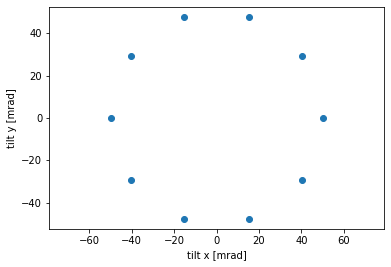

In [61]:
tilt = precession_tilts(50, 10)

plt.plot(*tilt.T, "o")
plt.xlabel("tilt x [mrad]")
plt.ylabel("tilt y [mrad]")
plt.axis("equal");

In [62]:
plane_wave.tilt = tilt

In [63]:
exit_wave = plane_wave.multislice(potential)

exit_wave.array

dask.array<_extract_measurement, shape=(1, 10, 339, 408), dtype=complex64, chunksize=(1, 10, 339, 408), chunktype=numpy.ndarray>

In [65]:
measurement = exit_wave.diffraction_patterns(max_angle=20).mean(0)

measurement.compute()

[########################################] | 100% Completed | 12.6s


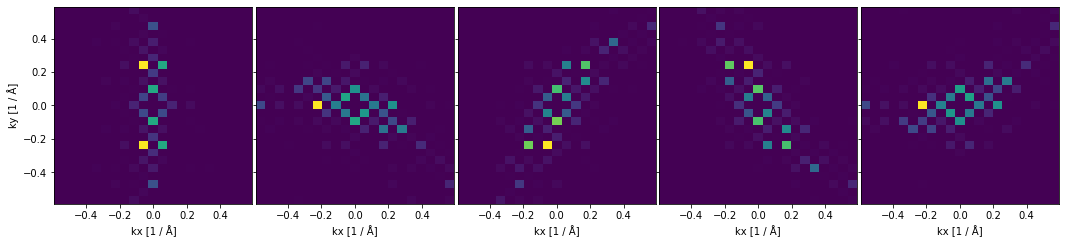

In [75]:
measurement[::2].block_direct().show(
    explode=True,
    panel_titles=False,
    figsize=(18, 5),
    image_grid_kwargs={"axes_pad": 0.05},
);

In [79]:
spots = (
    measurement[4]
    .index_diffraction_spots(cell=cell)
    .remove_low_intensity()
)

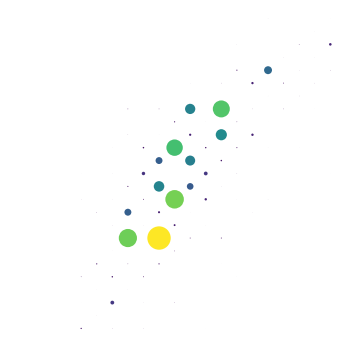

In [80]:
fig, ax = spots.show(spot_scale=1.5, overlay_indices=False)
ax.axis("off")
plt.savefig("../thumbnails/ped_quickstart.png", bbox_inches="tight", pad_inches=0)